# **DESAFIO 02 - MANUTENÇÃO PREVENTIVA**

A base que utilizaremos representa dados operacionais de máquinas e a indicação de algum tipo de falha operacional que tenha sido detectado. A base pode carregada [daqui](https://github.com/cassiusf/datasets/raw/refs/heads/main/desafios/Dataset_Manutencao_Preventiva.csv) e o objetivo é prever eventuais situações que levem à parada operacional.


Este conjunto de dados reflete informações relacionadas à manutenção preditiva real encontrada na indústria, possuindo 10.000 registros e 14 variáveis:

- **UDI**: identificador único que varia de 1 a 10.000.
- **product ID**: consistindo em uma letra L, M ou H para baixo (50% de todos os produtos), médio (30%) e alto (20%) como variantes de qualidade do produto e um número de série específico da variante.
- **type**: letra relacionada ao ***product ID***
- **air temperature [K]**: gerada usando um processo de caminhada aleatória posteriormente normalizada para um desvio padrão de 2 K em torno de 300 K.
- **process temperature [K]**: gerada usando um processo de caminhada aleatória normalizado para um desvio padrão de 1 K, adicionado à temperatura do ar mais 10 K.
- **rotational speed [rpm]**: calculada a partir de uma potência de 2860 W, sobreposta com um ruído normalmente distribuído.
- **torque [Nm]**: os valores de torque são normalmente distribuídos em torno de 40 Nm com um Ïƒ = 10 Nm e sem valores negativos.
- **tool wear [min]**: as variantes de qualidade H/M/L adicionam 5/3/2 minutos de desgaste da ferramenta à ferramenta usada no processo. e um
O rótulo "falha da máquina" que indica se a máquina falhou neste ponto de dados específico para qualquer um dos seguintes modos de falha é verdadeiro.
- **machine failure**: rótulo que indica se a máquina falhou neste ponto de dados específico para qualquer um dos modos de falha abaixo.

As falhas consistem em cinco modos de falha independentes

- **Tool Wear Failure (TWF) (Falha de desgaste da ferramenta)**: a ferramenta passa por substituição ou apresenta falha em um tempo de desgaste da ferramenta entre 200 e 240 minutos.
- **Heat Dissipation Failure (HDF) (Falha de dissipação de calor)**: a dissipação de calor causa uma falha no processo, se a diferença entre a temperatura do ar e do processo estiver na faixa de 8.6K e a velocidade de rotação da ferramenta estiver abaixo de 1380 rpm.
- **Power Failure (PWF) (Falha de energia)**: o produto do torque e da velocidade de rotação (em rad/s) é igual à potência necessária para o processo. Se essa potência estiver abaixo de 3500 W ou acima de 9000 W, o processo falhará.
- **Overstrain Failure (OSF) (Falha por sobretensão)**: se o produto do desgaste e torque da ferramenta exceder 11.000 Nm para a variante do produto L, 12.000 para o M e 13.000 para o H, o processo falha devido a sobretensão.
- **Random Failures (RNF) (Falhas aleatórias)**: cada processo tem uma chance de falha de 0,1%, independentemente de seus parâmetros de processo.

Se pelo menos um dos modos de falha acima acontecer, o processo como um todo falhará e o rótulo `machine failure` será definido como 1. Portanto, não é totalmente transparente para o modelo de aprendizado de máquina qual dos modos de falha efetivamente foi responsável pela falha do processo.


## **TAREFA**

Seu objetivo é utilizar um modelo de machine learning rasa para prever a ocorrência de falhas mecânicas.

Utilize um modelo para benchmark diferente do modelo-alvo que decidir usar. Este benchamark será escolhido por você de acordo com o domínio da aplicação e será utilizado como referência a ser batida por seu modelo-alvo, que hipoteticamente será utilizado em produção.

Você deverá fazer todas es etapas necessárias tanto na avaliação dos dados disponíveis quanto na preparação necessária para execução dos modelos escolhidos.

Todas as etapas devem ser documentadas e as escolhas justificadas.

A performance do seu modelo deverá ser avaliada pelas métricas Acurácia, Precision, Recall e/ou F1-Score. Inclua em sua avaliação final de performance Curvas, ROC e/ou Precision-Recall, de acordo com a necessidade e a comparação de performnce entre seu modelo-alvo e o benchmark proposto.

**Está proibido, neste desafio, o uso de qualquer ferramentaque automatize processo, de análise e/ou modelagem. Todo o processo deve ser feito de forma artesanal, pensando em cada etapa e escolhendo o ferramental apropriado, com as devidas justificativas.**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/cassiusf/datasets/refs/heads/main/desafios/Dataset_Manutencao_Preventiva.csv"
df = pd.read_csv(url)
df.head()



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [4]:
##verificando nulos
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
##removendo colunas que nao serao utilizadas 
df_limpo = df.drop(columns=["UDI","TWF","HDF","PWF","OSF","RNF"])

In [6]:
#verificando quantas variaveis tem nas categoricas 

(df[['Type', 'Product ID']].nunique())

Type              3
Product ID    10000
dtype: int64

In [7]:
#dropando colunas product ID 
df_limpo.drop(columns="Product ID")

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [8]:
# Removendo corretamente a coluna e sobrescrevendo df_limpo
df_limpo = df_limpo.drop(columns=["Product ID"], errors="ignore")

# Aplicando One-Hot Encoding
df_limpo = pd.get_dummies(df_limpo, columns=["Type"])

In [9]:
df_limpo

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,False,True,False
2,298.1,308.5,1498,49.4,5,0,False,True,False
3,298.2,308.6,1433,39.5,7,0,False,True,False
4,298.2,308.7,1408,40.0,9,0,False,True,False
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,False,False,True
9996,298.9,308.4,1632,31.8,17,0,True,False,False
9997,299.0,308.6,1645,33.4,22,0,False,False,True
9998,299.0,308.7,1408,48.5,25,0,True,False,False


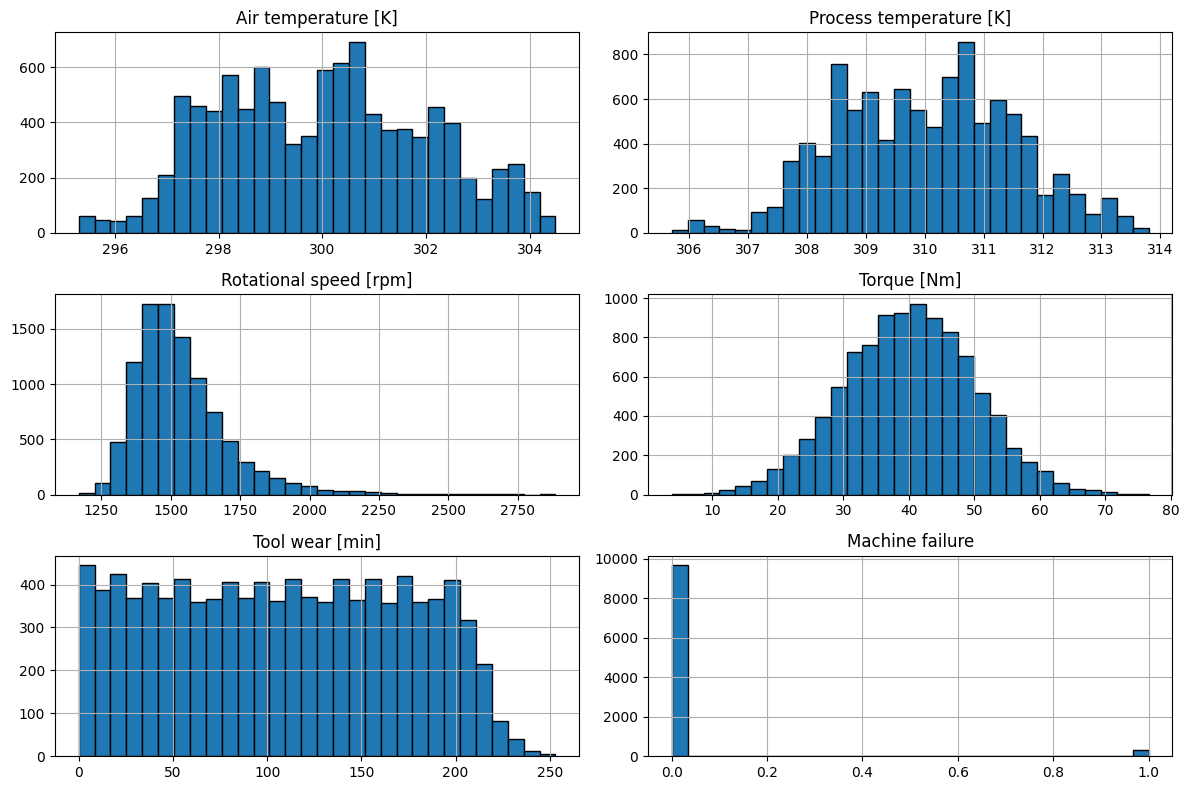

In [10]:

# Criando histogramas para todas as colunas numéricas
df_limpo.hist(figsize=(12, 8), bins=30, edgecolor="black")

plt.tight_layout()  
plt.show()

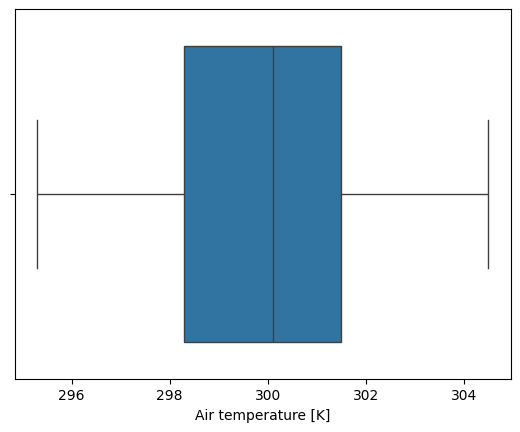

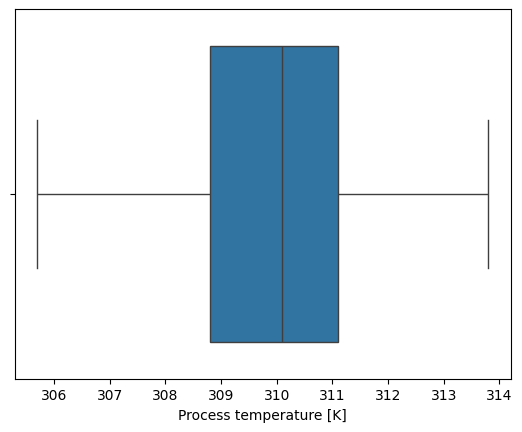

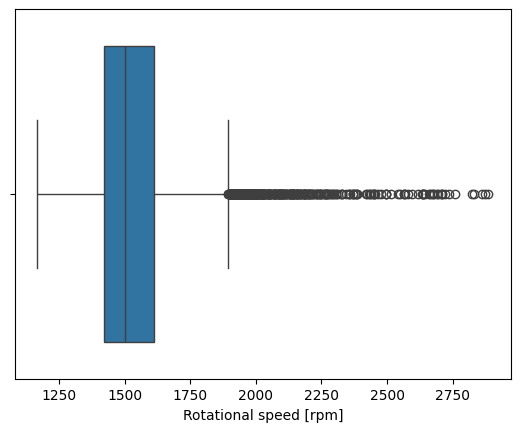

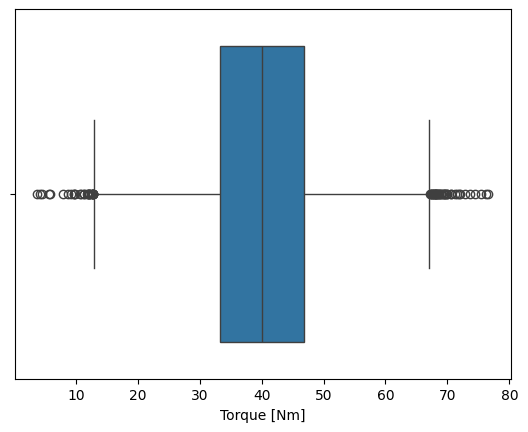

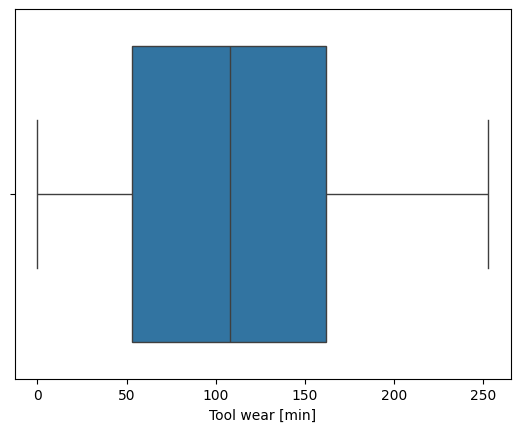

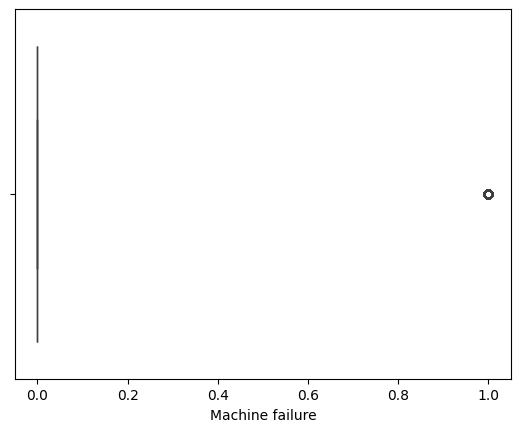

In [11]:
##verificando outliers 

for column in df_limpo.select_dtypes(include=["number"]).columns:
    plt.Figure
    sns.boxplot(x=df_limpo[column])
    plt.show()

In [15]:
##vericando quantos outliers tem, para avaliar se vale a pena tirar 

import numpy as np    
df_numerico = df_limpo.select_dtypes(include=["number"])


Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)

IQR = Q3 - Q1 #intervalor interquatil


##definindo limites para outliers 

limite_inferior = Q1 - 1.5 *IQR
limite_superior = Q3 + 1.5 *IQR

outliers_por_coluna = ((df_numerico < limite_inferior) | (df_numerico > limite_superior)).sum()

print("quantidade de outliers por coluna", outliers_por_coluna)


 

quantidade de outliers por coluna Air temperature [K]          0
Process temperature [K]      0
Rotational speed [rpm]     418
Torque [Nm]                 69
Tool wear [min]              0
Machine failure            339
dtype: int64


In [ ]:
##percentual de outliers em relação a tabela 
total_registro = df_limpo.shape[0]

percentual_outliers= (outliers_por_coluna/total_registro) *100

print(percentual_outliers)

Air temperature [K]        0.00
Process temperature [K]    0.00
Rotational speed [rpm]     4.18
Torque [Nm]                0.69
Tool wear [min]            0.00
Machine failure            3.39
dtype: float64


In [20]:
##removendo outliers 

df_limpo = df_limpo[
    (df_limpo["Rotational speed [rpm]"] >= limite_inferior["Rotational speed [rpm]"]) &
    (df_limpo["Rotational speed [rpm]"] <= limite_superior["Rotational speed [rpm]"]) &
    (df_limpo["Torque [Nm]"] >= limite_inferior["Torque [Nm]"]) &
    (df_limpo["Torque [Nm]"] <= limite_superior["Torque [Nm]"])
]

In [24]:
# Recalcular os quartis e IQR após a remoção
df_numerico = df_limpo.select_dtypes(include=["number"])
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1

# Recalcular os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Verificar se ainda existem outliers
outliers_restantes = ((df_numerico < limite_inferior) | (df_numerico > limite_superior)).sum()

print("Quantidade de outliers restantes por coluna:\n", outliers_restantes)


Quantidade de outliers restantes por coluna:
 Air temperature [K]          0
Process temperature [K]      0
Rotational speed [rpm]     114
Torque [Nm]                  8
Tool wear [min]              0
Machine failure            267
dtype: int64
